# **WORK ON THIS UNTIL YOU COULD SUMMERIZE AS  SENTENCES OR PSEUDO CODE THEN WRITE THE CODE WITHOUT LOOKING AT IT.**

# **`MAKEMORE PART1 TURKISH`**

### **`LOAD TURKISH DATA AND FILTER FOR ONLY NAMES(NO GENDER)`:**

In [1]:
import unicodedata

with open('turkce_isim.csv', 'r' ) as f:
    data = f.read().splitlines()  
names = [i.split(',')[0]for i in data[1:]]
chs_set = set()

for name in names:
    for ch in list(name):
        chs_set.add(ch)       
print(sorted(list(chs_set)),len(sorted(list(chs_set))))   

['a', 'b', 'c', 'd', 'e', 'f', 'g', 'h', 'i', 'j', 'k', 'l', 'm', 'n', 'o', 'p', 'r', 's', 't', 'u', 'v', 'w', 'x', 'y', 'z', 'ç', 'ö', 'ü', 'ğ', 'ı', 'ş'] 31


### **`SORT FOR TURKISH ALPHABET-(THIS IS READY BELOW)`:**

In [2]:
turkish_sort = ['a', 'b', 'c', 'ç', 'd', 'e', 'f', 'g', 'ğ', 'h', 'ı', 'i', 'j', 'k', 'l', 'm', 'n', 'o','ö', 'p', 'r', 's', 'ş', 't', 'u','ü', 'v', 'w', 'x', 'y', 'z']
turkish_sort.insert(0,'.')
turkish_sort,len(turkish_sort)

(['.',
  'a',
  'b',
  'c',
  'ç',
  'd',
  'e',
  'f',
  'g',
  'ğ',
  'h',
  'ı',
  'i',
  'j',
  'k',
  'l',
  'm',
  'n',
  'o',
  'ö',
  'p',
  'r',
  's',
  'ş',
  't',
  'u',
  'ü',
  'v',
  'w',
  'x',
  'y',
  'z'],
 32)

### **`CREATE A STRING TO INTEGER(stoi) DICTIONARY FROM 'turkish_sort' list `:**

In [3]:
stoi = {ch:i for i,ch in enumerate(turkish_sort)}
stoi

{'.': 0,
 'a': 1,
 'b': 2,
 'c': 3,
 'ç': 4,
 'd': 5,
 'e': 6,
 'f': 7,
 'g': 8,
 'ğ': 9,
 'h': 10,
 'ı': 11,
 'i': 12,
 'j': 13,
 'k': 14,
 'l': 15,
 'm': 16,
 'n': 17,
 'o': 18,
 'ö': 19,
 'p': 20,
 'r': 21,
 's': 22,
 'ş': 23,
 't': 24,
 'u': 25,
 'ü': 26,
 'v': 27,
 'w': 28,
 'x': 29,
 'y': 30,
 'z': 31}

### **`CREATE A INTEGER TO STRING(itos) DICTIONARY FROM 'stoi' list `:**

In [4]:
itos = {i: st for st, i in stoi.items()}
itos

{0: '.',
 1: 'a',
 2: 'b',
 3: 'c',
 4: 'ç',
 5: 'd',
 6: 'e',
 7: 'f',
 8: 'g',
 9: 'ğ',
 10: 'h',
 11: 'ı',
 12: 'i',
 13: 'j',
 14: 'k',
 15: 'l',
 16: 'm',
 17: 'n',
 18: 'o',
 19: 'ö',
 20: 'p',
 21: 'r',
 22: 's',
 23: 'ş',
 24: 't',
 25: 'u',
 26: 'ü',
 27: 'v',
 28: 'w',
 29: 'x',
 30: 'y',
 31: 'z'}

### **`CREATE A N MATRIX FOR 32 CHRS`:**
- **`N HOLDS NUMBERS OF BIGRAMS IN THE NAMES IN THE DATA.`**
- **`NO ITEM IN THE N MATRIX SHOULD BE ZERO.(TELL WHY)`**

In [5]:
import torch
N = torch.zeros((32, 32), dtype=torch.int32)

for chs in names:
    chs = '.'+ chs +'.'
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        N[ix,iy] += 1

### **`PLOT THE MATRIX`:**

In [6]:
#!pip install matplotlib

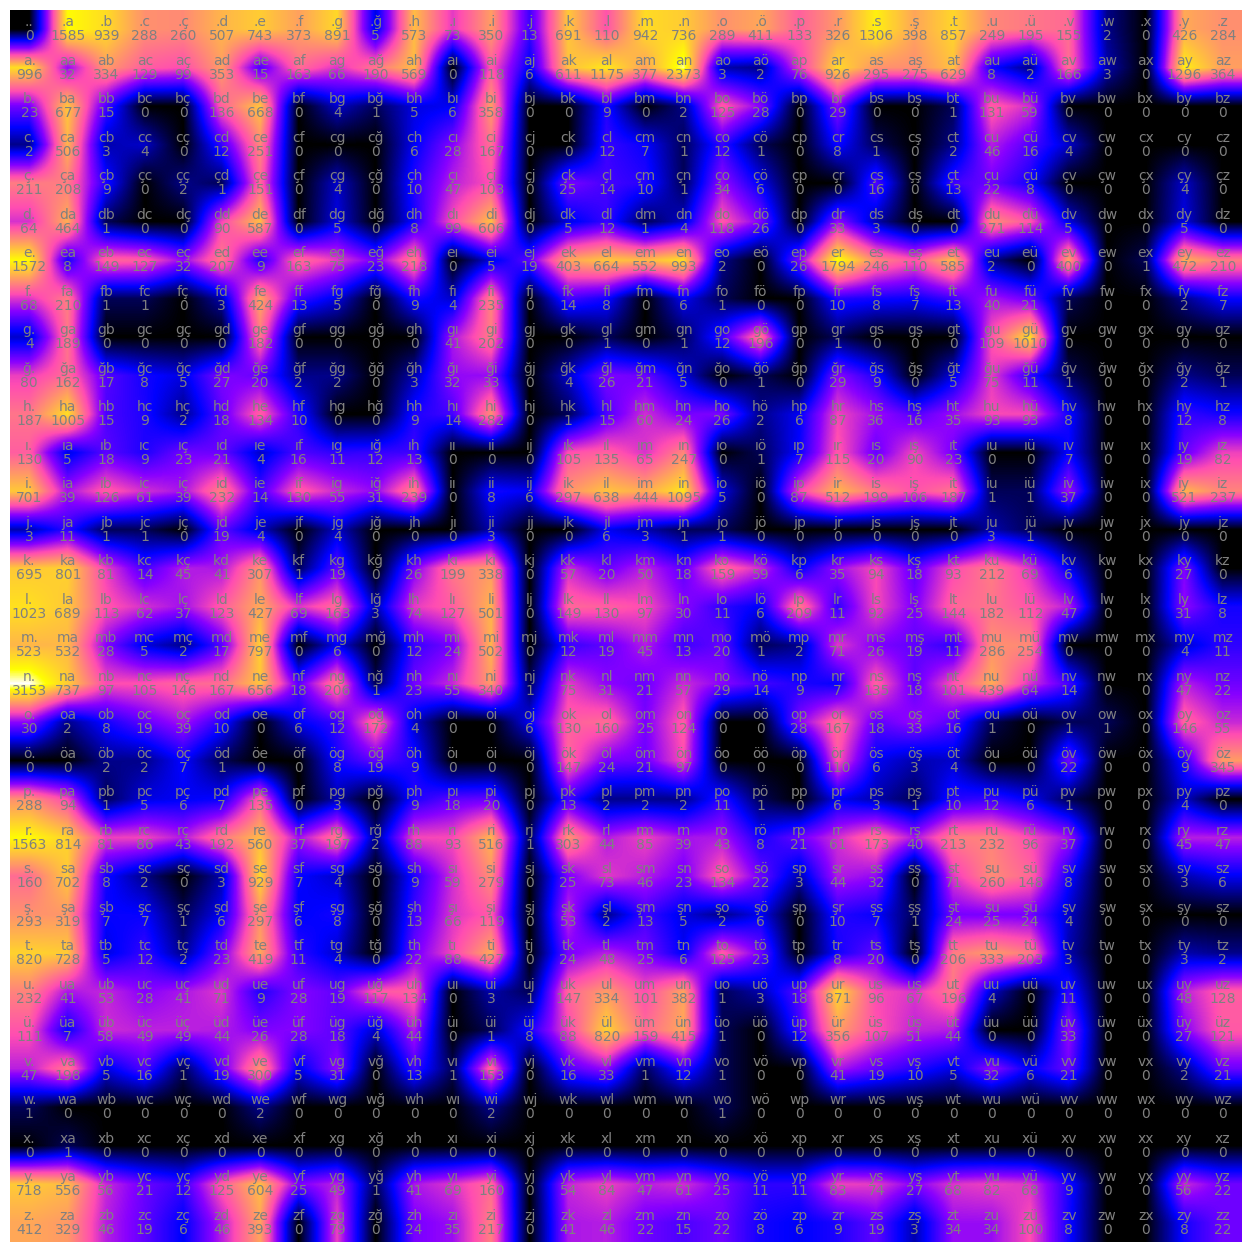

In [7]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(16,16))
plt.imshow(torch.log(N+1), cmap='gnuplot2', interpolation='bilinear')
for i in range(32):
    for j in range(32):
        chstr = itos[i] + itos[j]
        plt.text(j, i, chstr, ha="center", va="bottom", color='gray')
        plt.text(j, i, N[i, j].item(), ha="center", va="top", color='gray')
plt.axis('off');

### **`What does multinomial distribution do?(use with this generator seed 2147483647)`**
**`pluck out one line of the matrix and mormalize it despite this:`**

`While I was trying to understand the multinomial distribution, I realized that there is no need to normalize the distribution. The multinomial distribution is already normalized. If the sum of the probabilities is not 1, then torch.multinomial use floats as weights and the result will be the same.`



In [8]:
P= N[0].float()
P

tensor([   0., 1585.,  939.,  288.,  260.,  507.,  743.,  373.,  891.,    5.,
         573.,   73.,  350.,   13.,  691.,  110.,  942.,  736.,  289.,  411.,
         133.,  326., 1306.,  398.,  857.,  249.,  195.,  155.,    2.,    0.,
         426.,  284.])

In [9]:
# beware it only works for the first row. if yo want to normalize the whole matrix, you need to to use the dim=1 parameter and need to keepdims=True
Normalized =  P/P.sum()
Normalized

tensor([0.0000, 0.1123, 0.0665, 0.0204, 0.0184, 0.0359, 0.0527, 0.0264, 0.0631,
        0.0004, 0.0406, 0.0052, 0.0248, 0.0009, 0.0490, 0.0078, 0.0668, 0.0522,
        0.0205, 0.0291, 0.0094, 0.0231, 0.0926, 0.0282, 0.0607, 0.0176, 0.0138,
        0.0110, 0.0001, 0.0000, 0.0302, 0.0201])

In [10]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(Normalized,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

In [11]:
g = torch.Generator().manual_seed(2147483647)
torch.multinomial(P,10,generator=g)

tensor([10, 22,  1,  2, 12, 21, 16,  3,  4,  8])

### **`HOW DOES torch.sum works in a matrix:`**
`What are the dimensions?` ([torch.sum link:](https://pytorch.org/docs/stable/generated/torch.sum.html))

`Explore the torch.sum with dimensons over torch.arange(4 * 5 * 6).view(4, 5, 6) matrix.`

`Normalize the matrix along the rows: the normalized matrix (P) should represent the probability of bigrams in the`**`names`**



In [12]:
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
b

tensor([[[  0,   1,   2,   3,   4,   5],
         [  6,   7,   8,   9,  10,  11],
         [ 12,  13,  14,  15,  16,  17],
         [ 18,  19,  20,  21,  22,  23],
         [ 24,  25,  26,  27,  28,  29]],

        [[ 30,  31,  32,  33,  34,  35],
         [ 36,  37,  38,  39,  40,  41],
         [ 42,  43,  44,  45,  46,  47],
         [ 48,  49,  50,  51,  52,  53],
         [ 54,  55,  56,  57,  58,  59]],

        [[ 60,  61,  62,  63,  64,  65],
         [ 66,  67,  68,  69,  70,  71],
         [ 72,  73,  74,  75,  76,  77],
         [ 78,  79,  80,  81,  82,  83],
         [ 84,  85,  86,  87,  88,  89]],

        [[ 90,  91,  92,  93,  94,  95],
         [ 96,  97,  98,  99, 100, 101],
         [102, 103, 104, 105, 106, 107],
         [108, 109, 110, 111, 112, 113],
         [114, 115, 116, 117, 118, 119]]])

In [13]:
#got it
#the result is (1, 5, 6) tensor. it is the sum of the 1st(dim=0) dimension of the input tensor
b = torch.arange(4 * 5 * 6).view(4, 5, 6)
torch.sum(b,0,keepdim=True)




tensor([[[180, 184, 188, 192, 196, 200],
         [204, 208, 212, 216, 220, 224],
         [228, 232, 236, 240, 244, 248],
         [252, 256, 260, 264, 268, 272],
         [276, 280, 284, 288, 292, 296]]])

In [14]:
#got it
#the result is (4, 1, 6) tensor. Because we sum the second(dim=1) dimension.
torch.sum(b,1,keepdim=True)

tensor([[[ 60,  65,  70,  75,  80,  85]],

        [[210, 215, 220, 225, 230, 235]],

        [[360, 365, 370, 375, 380, 385]],

        [[510, 515, 520, 525, 530, 535]]])

In [15]:
#got it
#the result is (4, 5, 1) tensor. Because we sum the third(dim=2) dimension. 
torch.sum(b,2,keepdim=True)

tensor([[[ 15],
         [ 51],
         [ 87],
         [123],
         [159]],

        [[195],
         [231],
         [267],
         [303],
         [339]],

        [[375],
         [411],
         [447],
         [483],
         [519]],

        [[555],
         [591],
         [627],
         [663],
         [699]]])

In [16]:
N.add_(1)# this is for smoothing
P = N / N.sum(1,keepdim=True)
P[0]

tensor([7.0711e-05, 1.1215e-01, 6.6469e-02, 2.0436e-02, 1.8456e-02, 3.5921e-02,
        5.2609e-02, 2.6446e-02, 6.3075e-02, 4.2427e-04, 4.0588e-02, 5.2326e-03,
        2.4820e-02, 9.8996e-04, 4.8932e-02, 7.8490e-03, 6.6681e-02, 5.2114e-02,
        2.0506e-02, 2.9133e-02, 9.4753e-03, 2.3123e-02, 9.2420e-02, 2.8214e-02,
        6.0670e-02, 1.7678e-02, 1.3859e-02, 1.1031e-02, 2.1213e-04, 7.0711e-05,
        3.0194e-02, 2.0153e-02])

### **`Sample 10 names the normalized matrix (P)`** 

In [17]:
#first sample from the N as you start with the first character(.) which is 0 

for i in range(10):
    synt_name = [] 
    ix = 0
    while True:
    p = torch.multinomial(P[ix],1,replacement)        
        synt_name.append(itos[p.item()])
        ix = p.item()
        if ix == 0:
            print(''.join(synt_name))
            break
    
    
    

ş.
ş.
tonç.
durimeşk.
havuttürületursihüktist.
ismahisen.
se.
ön.
cal.
iladetaye.


Genders and meanings are assigned by the external model.
- Gülelkahi (Female): Gülelkahi, eski zamanlarda kullanılan bir neşe büyüsüdür.
- Çirgül (Female): Çirgül, bir tür hızlı ve neşeli dansın adıdır.
- Tigetoran (Male): Tigetoran, mitolojide geçen efsanevi bir yaratığın adıdır.
- Emerin (Female): Emerin, antik bir dilde "ışık saçan" anlamına gelir.
- Avzin (Male): Avzin, geleneksel bir av töreninin adıdır.
- Setulağmen (Male): Setulağmen, bir tür eski ve nadir bulunan taşın adıdır.
- Günbedin (Male): Günbedin, güneşin doğuşunu kutlamak için düzenlenen bir festivalin adıdır.
- Sülsan (Female): Sülsan, bir tür egzotik çiçeğin adıdır.
- Bihasel (Female): Bihasel, bir tür eski ve gizemli yazının adıdır.
- Kınkan (Male): Kınkan, bir tür geleneksel müzik aletinin adıdır.
- Cizüne (Female): Cizüne, bir tür eski ve nadir bulunan kuşun adıdır.
- Imensar (Male): Imensar, bir tür eski ve gizemli taşın adıdır.
- Kayratura (Male): Kayratura, bir tür geleneksel halk dansının adıdır.
- Mühan

### **`Print the probabilities of the first three names`** 
**`to make a good model probabilities should be max, because these names are in the list, they are real names`**

**`Write them side by side: bigram, its prob, its log prob(only the first three names)`**

**`log prob is for convenience, because product of probabilities would be hard to calculate cosidering the small numbers`**

In [37]:
for w in names:
    chs = ['.']+ list(w) +['.']
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        print(f'{i[0]}{i[1]} prob:{P[ix,iy].item():5f}   log prob:{P[ix,iy].log().item():5f}')
# How to get the log of a whole tensor
P

# BELOW CALCULATION IS NOT RIGHT I'VE MADE A MISTAKE CHECK THE NEXT CELL BY ANDREJ KARPATHY
# MY MATRIX CALCULATION IS NOT EQUAL TO NN BELOW. BUT ANDREJ'S IS. NOT A BIG PROBLEM BUT IMPORTANT
# OTHER THAN THAT IT IS GOOD TO GO.

pmult = P
#total log probability
p_mult = P.view(-1).log().sum()
print(f' total total log probability:{p_mult}')
# average log probability
p_ave = P.view(-1).log().sum()/P.numel()
print(f' average log probability:{p_ave}')   
P.numel()           

.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
a. prob:0.085338   log prob:-2.461139
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ac prob:0.011127   log prob:-4.498356
ca prob:0.452275   log prob:-0.793465
a. prob:0.085338   log prob:-2.461139
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ac prob:0.011127   log prob:-4.498356
ca prob:0.452275   log prob:-0.793465
an prob:0.203201   log prob:-1.593559
n. prob:0.462463   log prob:-0.771188
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
aç prob:0.008559   log prob:-4.760720
ç. prob:0.227712   log prob:-1.479673
.a prob:0.112148   log prob:-2.187934
ab prob:0.028674   log prob:-3.551759
ba prob:0.293634   log prob:-1.225423
ay prob:0.111016   log prob:-2.198081
y. prob:0.22

1024

In [38]:
log_likelihood = 0.0
n = 0

for w in names:
#for w in ["andrejq"]:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    prob = P[ix1, ix2]
    logprob = torch.log(prob)
    log_likelihood += logprob
    n += 1
    #print(f'{ch1}{ch2}: {prob:.4f} {logprob:.4f}')

print(f'{log_likelihood=}')
nll = -log_likelihood
print(f'{nll=}')
print(f'{nll/n}')

log_likelihood=tensor(-253723.5312)
nll=tensor(253723.5312)
2.4996652603149414


# **`A Similiar solution with a neural network `**

### **`Create a dataset from names`** 
**`xxxxx`**

In [19]:
xs,ys = [],[]
for name in names[:1]:
    chs = '.'+ name + '.'
    for i in zip(chs,chs[1:]):
        ix=stoi[i[0]]
        iy=stoi[i[1]]
        xs.append(ix)
        ys.append(iy)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
        


In [20]:
import torch.nn.functional as F
xenc = F.one_hot(xs,32).float()
xenc

tensor([[1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.],
        [0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
         0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.]])

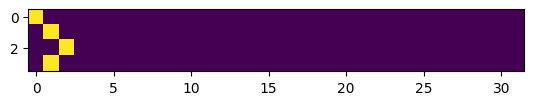

In [21]:
plt.imshow(xenc)

In [22]:
# xenc.shape is torch.Size([4, 32]) and the weitght shape is torch.Size([32, 1])
# result shape is torch.Size([4, 1])
#as w is a neuron below:
W = torch.randn((32,1),requires_grad=True)
xenc @ W

tensor([[-0.2346],
        [ 2.4610],
        [-0.0249],
        [ 2.4610]], grad_fn=<MmBackward0>)

#### **`What happens here *One hot effect on the network)`** 
**`it is important to understand what is going on below.`**

**Now we have 32 neurons but every time only one of them active. Because on the one hot vector only one of the values is 1 the rest is zero, and that means only one of the neurons working and others are waiting their turn.Simply they work exactly like the matrix for the counts, every neuron accummulates only one rows log counts.**

In [23]:
#if we were to use a tensor of shape torch.shape([32,32]) as the weight tensor, we would have a result of torch.shape([4,32])
# that means we have 32 outputs for each input tensor and these 32 outputs are the probabilities of the next character
# 
W = torch.randn((32,32), requires_grad=True)
xenc @ W

tensor([[ 0.0445, -0.3710, -0.1058, -0.4236, -0.1798,  1.2708, -1.4253, -1.5443,
          0.1320, -1.1361, -0.1589,  0.0774,  0.2034,  0.5301, -0.7792, -1.7858,
          0.3181,  0.4742, -2.0974, -1.2132, -1.9017,  0.6497,  1.3687,  0.0613,
         -0.2508, -0.4712,  1.7896, -0.9119, -1.2574,  2.2057, -0.2633,  0.3100],
        [-0.0280, -0.3065,  0.6439, -0.4023,  1.1627,  0.0265, -0.3838,  0.1051,
          0.1133,  1.6896,  2.0150,  0.1771,  1.6930, -1.6274, -0.5360, -0.0131,
          0.7101,  0.4002, -0.7375,  1.3820, -0.9956, -0.5200,  0.6306, -1.1287,
          0.4617, -0.0048, -1.7030, -0.6951,  1.9746,  1.2097, -1.3017,  0.7897],
        [-2.9431,  1.2094,  0.3213,  0.5608, -0.9930,  0.7892, -1.0419,  0.0085,
         -1.6591, -1.2515, -0.2696,  1.5384,  0.7879, -1.0892,  0.4212, -0.3658,
         -0.5304, -1.3333,  0.0157, -1.0196,  0.3350, -0.8570, -0.6717, -0.5327,
         -0.0166, -0.7978,  2.5006,  0.8104,  0.7189, -2.4123, -0.2161, -1.1758],
        [-0.0280, -0.3065

In [25]:
logits = xenc @ W # logits are the raw scores of the model considered as log-counts(similiar to matrix count above)
#to make them all positive, we can exponentiate them
# THIS BELOW IS THE SOFTMAX FUNCTION
counts = torch.exp(logits)
probs = counts / counts.sum(1,keepdim=True) # sum them through the rows
probs


tensor([[0.0233, 0.0154, 0.0201, 0.0146, 0.0186, 0.0795, 0.0054, 0.0048, 0.0255,
         0.0072, 0.0190, 0.0241, 0.0273, 0.0379, 0.0102, 0.0037, 0.0307, 0.0358,
         0.0027, 0.0066, 0.0033, 0.0427, 0.0877, 0.0237, 0.0174, 0.0139, 0.1335,
         0.0090, 0.0063, 0.2025, 0.0171, 0.0304],
        [0.0162, 0.0122, 0.0316, 0.0111, 0.0531, 0.0171, 0.0113, 0.0185, 0.0186,
         0.0900, 0.1246, 0.0198, 0.0903, 0.0033, 0.0097, 0.0164, 0.0338, 0.0248,
         0.0079, 0.0662, 0.0061, 0.0099, 0.0312, 0.0054, 0.0264, 0.0165, 0.0030,
         0.0083, 0.1197, 0.0557, 0.0045, 0.0366],
        [0.0012, 0.0738, 0.0304, 0.0386, 0.0082, 0.0485, 0.0078, 0.0222, 0.0042,
         0.0063, 0.0168, 0.1026, 0.0484, 0.0074, 0.0336, 0.0153, 0.0130, 0.0058,
         0.0224, 0.0079, 0.0308, 0.0093, 0.0113, 0.0129, 0.0217, 0.0099, 0.2685,
         0.0495, 0.0452, 0.0020, 0.0177, 0.0068],
        [0.0162, 0.0122, 0.0316, 0.0111, 0.0531, 0.0171, 0.0113, 0.0185, 0.0186,
         0.0900, 0.1246, 0.0198, 0.0903,

In [26]:
# direct from the lesson. Not by me.

nlls = torch.zeros(4)
for i in range(4):
  # i-th bigram:
  x = xs[i].item() # input character index
  y = ys[i].item() # label character index
  print('--------')
  print(f'bigram example {i+1}: {itos[x]}{itos[y]} (indexes {x},{y})')
  print('input to the neural net:', x)
  print('output probabilities from the neural net:', probs[i])
  print('label (actual next character):', y)
  p = probs[i, y]
  print('probability assigned by the net to the the correct character:', p.item())
  logp = torch.log(p)
  print('log likelihood:', logp.item())
  nll = -logp
  print('negative log likelihood:', nll.item())
  nlls[i] = nll

print('=========')
print('average negative log likelihood, i.e. loss =', nlls.mean().item())

--------
bigram example 1: .a (indexes 0,1)
input to the neural net: 0
output probabilities from the neural net: tensor([0.0233, 0.0154, 0.0201, 0.0146, 0.0186, 0.0795, 0.0054, 0.0048, 0.0255,
        0.0072, 0.0190, 0.0241, 0.0273, 0.0379, 0.0102, 0.0037, 0.0307, 0.0358,
        0.0027, 0.0066, 0.0033, 0.0427, 0.0877, 0.0237, 0.0174, 0.0139, 0.1335,
        0.0090, 0.0063, 0.2025, 0.0171, 0.0304], grad_fn=<SelectBackward0>)
label (actual next character): 1
probability assigned by the net to the the correct character: 0.015391817316412926
log likelihood: -4.173919200897217
negative log likelihood: 4.173919200897217
--------
bigram example 2: ab (indexes 1,2)
input to the neural net: 1
output probabilities from the neural net: tensor([0.0162, 0.0122, 0.0316, 0.0111, 0.0531, 0.0171, 0.0113, 0.0185, 0.0186,
        0.0900, 0.1246, 0.0198, 0.0903, 0.0033, 0.0097, 0.0164, 0.0338, 0.0248,
        0.0079, 0.0662, 0.0061, 0.0099, 0.0312, 0.0054, 0.0264, 0.0165, 0.0030,
        0.0083, 0.1197, 

In [27]:
# these are for the 4 characters of the first name in the list
# normally in the long form, we would have prob[0,character1], prob[1,character2], prob[2,character3], prob[3,character4]
# in short it is possible to get the probabilities of the characters in the list by using 
probs[torch.arange(4),ys]
#ys is the list of the characters in the list

tensor([0.0154, 0.0316, 0.0738, 0.0162], grad_fn=<IndexBackward0>)

In [28]:
#the loss then is the negative log likelihood of the correct characters in the list
nlls = -torch.log(probs[torch.arange(4),ys])
print(f'nlls: {nlls}, nll mean: {nlls.mean()}')

nlls: tensor([4.1739, 3.4534, 2.6060, 4.1254], grad_fn=<NegBackward0>), nll mean: 3.5896964073181152


In [29]:
#bacward pass
W.grad = None
nlls.mean().backward()

In [30]:
W.grad #the gradient of the loss with respect to the weights e.g the first one 0.0021 is nudging the loss up because it is a positive number

tensor([[ 0.0058, -0.2462,  0.0050,  ...,  0.0506,  0.0043,  0.0076],
        [-0.2419,  0.0061, -0.2342,  ...,  0.0279,  0.0023,  0.0183],
        [ 0.0003, -0.2315,  0.0076,  ...,  0.0005,  0.0044,  0.0017],
        ...,
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000],
        [ 0.0000,  0.0000,  0.0000,  ...,  0.0000,  0.0000,  0.0000]])

In [31]:
W.data += -0.1 * W.grad

In [32]:
#OPTIMIZED
# create the dataset
xs, ys = [], []
for w in names:
  chs = ['.'] + list(w) + ['.']
  for ch1, ch2 in zip(chs, chs[1:]):
    ix1 = stoi[ch1]
    ix2 = stoi[ch2]
    xs.append(ix1)
    ys.append(ix2)
xs = torch.tensor(xs)
ys = torch.tensor(ys)
num = xs.nelement()
print('number of examples: ', num)

# initialize the 'network'
g = torch.Generator().manual_seed(2147483647)
W = torch.randn((32, 32), generator=g, requires_grad=True)

number of examples:  101503


#### **`What happens here *Regularization Part)`** 
**`+ 0.01*(W**2).mean()`**

**we'd add +1 on the `N matrix` above for avoiding zero probability on the counts. The more addition the more smooth the matrix, eventually probabilities. The same happening here. If we add mean of weights to the loss, the probability would be smoother, the model should try to decrease Weights close to zero. as they close the zero the probability on the output would ne smooother. This is regularization.**

In [33]:
# gradient descent
for k in range(100):
  
  # forward pass
  xenc = F.one_hot(xs, num_classes=32).float() # input to the network: one-hot encoding
  logits = xenc @ W # predict log-counts
  counts = logits.exp() # counts, equivalent to N
  probs = counts / counts.sum(1, keepdims=True) # probabilities for next character
  loss = -probs[torch.arange(num), ys].log().mean() + 0.01*(W**2).mean()
  print(loss.item())
  
  # backward pass
  W.grad = None # set to zero the gradient
  loss.backward()
  
  # update
  W.data += -50 * W.grad

4.10652494430542
3.723175525665283
3.467954158782959
3.2872791290283203
3.1581199169158936
3.061901330947876
2.9870686531066895
2.9277234077453613
2.880150079727173
2.841637372970581
2.8100857734680176
2.783883810043335
2.761814594268799
2.742969036102295
2.726670026779175
2.712416172027588
2.699831962585449
2.6886343955993652
2.6786060333251953
2.669576406478882
2.661407947540283
2.653986930847168
2.6472203731536865
2.6410272121429443
2.635340690612793
2.6301023960113525
2.6252634525299072
2.620781660079956
2.6166210174560547
2.6127500534057617
2.6091413497924805
2.605771780014038
2.6026196479797363
2.5996663570404053
2.596895694732666
2.594292163848877
2.5918426513671875
2.5895352363586426
2.587358236312866
2.5853023529052734
2.5833580493927
2.581517457962036
2.5797722339630127
2.5781161785125732
2.576543092727661
2.5750467777252197
2.573622465133667
2.5722646713256836
2.570969820022583
2.569733142852783
2.5685513019561768
2.5674211978912354
2.5663387775421143
2.5653021335601807
2.56

In [35]:
# finally, sample from the 'neural net' model
#g = torch.Generator().manual_seed(2147483647)

for i in range(15):
  
  out = []
  ix = 0
  while True:
    
    # ----------
    # BEFORE:
    #p = P[ix]
    # ----------
    # NOW:
    xenc = F.one_hot(torch.tensor([ix]), num_classes=32).float()
    logits = xenc @ W # predict log-counts
    counts = logits.exp() # counts, equivalent to N
    p = counts / counts.sum(1, keepdims=True) # probabilities for next character
    # ----------
    
    ix = torch.multinomial(p, num_samples=1, replacement=True, generator=g).item()
    out.append(itos[ix])
    if ix == 0:
      break
  print(''.join(out))

sul.
deyan.
erımaran.
soğafayıonim.
zabaş.
orgüjbderanç.
tacar.
özalarabumüljğtbole.
i.
z.
gimer.
öğte.
n.
dı.
mett.
